In [23]:
# Packages
import itertools
import numpy as np
import math
import matplotlib.pyplot as plt

# 1. Flowchart

In [2]:
# Not elegant
def Print_values(a,b,c):
    if a > b:                
        if b > c:
            print(a+b-10*c)
        else:
            if a > c:
                print(a+c-10*b)  
            else:
                print(c+a-10*b)
    else:
        if b > c:
            if a > c:
                print(a+c-10*b)
            else:
                print(c+a-10*b)
        else:
            print(c+b-10*a)

In [3]:
Print_values(10,1,5.5)
Print_values(2,8,6)
Print_values(5,7.4,9.3)

5.5
-72
-33.3


# 2. Continuous ceiling function

In [4]:
def Continuous_ceiling(listq2in=[]):
    # result array
    listq2out = []
    # define the F funtion 
    def F(x):
        # F(1) = 1
        if x == 1:
            return 1
        return F(math.ceil(x/3)) + 2*x
    # fill the result array with corresponding F value.
    for i in range(len(listq2in)):
        listq2out.append(F(listq2in[i]))
    # return result array
    return listq2out

In [6]:
testlistq2 =[1,2,3,4,5,6,7,8,9]
print(Continuous_ceiling(testlistq2))

[1, 5, 7, 13, 15, 17, 21, 23, 25]


# 3. Dice rolling

# 3.1

Codes for 3.1 came from 
https://www.geeksforgeeks.org/dice-throw-dp-30/

Till the minute before I submit my codes, I am still trying to give my own codes but I have to admit that 3.1 is too difficult for me to finish on my own. I tried to understand the codes below.

In [7]:
# Python3 program to find the number of ways to get sum 'x' with 'n' 
# dice where every dice has 'm' faces
 
# The main function that returns number of ways to get sum 'x'
# with 'n' dice and 'm' with m faces.
def Find_number_of_ways(x):
    # Create a table to store results of subproblems. One extra
    # row and column are used for simplicity (Number of dice
    # is directly used as row index and sum is directly used
    # as column index). The entries in 0th row and 0th column
    # are never used.
    table=[[0]*(x+1) for i in range(11)] #Initialize all entries as 0
    for j in range(1,min(7,x+1)): #Table entries for only one dice
        table[1][j]=1
        
    # Fill rest of the entries in table using recursive relation
    # i: number of dice, j: sum
    for i in range(2,11):
        for j in range(1,x+1):
            for k in range(1,min(7,j)):
                table[i][j]+=table[i-1][j-k]
     
    #print(dt)
    # Uncomment above line to see content of table
    return table[-1][-1]

In [8]:
print(Find_number_of_ways(1))
print(Find_number_of_ways(10))
print(Find_number_of_ways(11))
print(Find_number_of_ways(26))
print(Find_number_of_ways(58))
print(Find_number_of_ways(60))
print(Find_number_of_ways(100))

0
1
10
1151370
55
1
0


# 3.2

In [10]:
# Array to store Number_of_Ways
Number_of_Ways = []
for i in range(10,61):
    # fill the array
    Number_of_Ways.append(Find_number_of_ways(i))
    # locat the maximum
    if i > 0:
        if Find_number_of_ways(i)> Find_number_of_ways(i-1):
            Maxx = i
# sum 35 yields the maximum of Number_of_ways
print(Maxx)
# The maximum is 4395456
print(Find_number_of_ways(Maxx))

35
4395456


# 4. Dynamic programming

# 4.1 

In [11]:
def Random_integer(N):
    return np.random.randint(0,11,N)

In [12]:
testlistq4_1 = Random_integer(12)
print(testlistq4_1)

[ 6  2 10 10  5  4  7  2  6  0 10  5]


# 4.2 

In [13]:
def Sum_averages(listq4_2=[]):
    # length of listq4_2
    n = len(listq4_2)
    # Initialize sum of averages
    m = 0
    for num in range(n):
        for i in itertools.combinations(listq4_2, num + 1):
            # sum of the average of all subsets of listq4_2. 
            m += np.mean(i)
    return m

In [14]:
testlistq4_2 = Random_integer(2)
print(testlistq4_2)
print(Sum_averages(testlistq4_2))

[8 4]
18.0


# 4.3 

In [27]:
# Array to store sum averages
Total_sum_averages = []
# time to reaching 100 is too long. pick 20 here as test.
for N in range(1,21):
    templist = Random_integer(N)
    # print(N)         print N to show the process
    #print(templist)   show every array
    # fill the array
    Total_sum_averages.append(Sum_averages(templist))
    #print(Sum_averages(templist))  show every sum averages
print(Total_sum_averages)

[7.0, 6.0, 25.666666666666668, 75.0, 105.39999999999999, 325.5, 725.7142857142858, 1370.6250000000007, 2725.333333333333, 6240.300000000003, 11351.545454545441, 23204.999999999945, 47255.76923076932, 102978.85714285707, 211893.26666666716, 348154.6875000045, 647644.9411764776, 1019445.0000000076, 2041959.8947368693, 5714733.750000031]


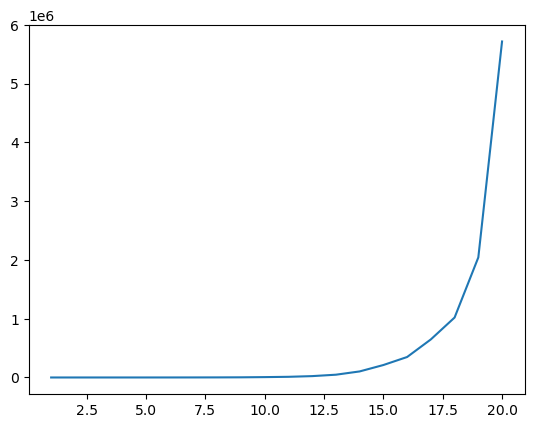

In [28]:
plt.figure()
x = np.arange(1,21)
plt.plot(x,Total_sum_averages)

It increases slowly at the beginning, then it increases exponentially-like.

# 5. Path counting

# 5.1 

In [16]:
def create_matrix(N,M):
    # create an array then reshape to N rows and M cols
    myMatrix = np.random.randint(0,2,N*M).reshape(N,M)
    # set right-bottom corner and top-left corner cells with 1
    myMatrix[0,0] = 1
    myMatrix[N-1,M-1]=1
    return myMatrix

In [17]:
testmatrix = create_matrix(10,10)
print(testmatrix)

[[1 0 0 1 0 0 1 1 0 0]
 [0 0 0 1 1 1 0 1 1 0]
 [1 1 0 1 1 0 0 1 0 0]
 [0 0 0 1 0 1 0 0 1 0]
 [0 0 1 1 0 0 1 0 1 0]
 [1 0 0 1 0 1 0 1 1 0]
 [1 0 0 0 1 1 0 1 1 1]
 [0 1 0 1 0 1 0 1 0 0]
 [1 0 0 1 0 1 1 0 1 0]
 [0 1 1 0 0 0 0 1 0 1]]


# 5.2

Codes for 5.2 were inspired by an example in CSDN: https://blog.csdn.net/zy854816286/article/details/104894159?spm=1001.2101.3001.6650.8&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7ERate-8-104894159-blog-121416033.pc_relevant_3mothn_strategy_and_data_recovery&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7ERate-8-104894159-blog-121416033.pc_relevant_3mothn_strategy_and_data_recovery&utm_relevant_index=9

In [18]:
def Count_path(inMatrix=[]):
    # N rows
    N = len(inMatrix)      
    # M columns
    M = len(inMatrix[0])    
    # create a new matrix which has identical shape of the inMatrix
    # to store the numbers of paths to reach corresponding cell in 
    # the inMatrix.
    path = np.zeros((N,M)) 
    # you can always reach the start cell with only one path
    path[0,0] = 1
    for i in range(N):
        for j in range(M):
            # 0 value means this cell is unreachable
            # so path number is 0.
            if inMatrix[i,j] == 0:
                path[i,j] = 0
                continue 
            # Reaching here means value of cell (i,j) in inMatrix 
            #is 1 and reachable. 
            # In row 1, reaching the point next to current cell shares
            # the same path. 
            if(i==0)&(j!=0):
                path[i,j]=path[i,j-1]
            # In col 1, reaching the point next to current cell shares
            # the same path.
            if(i!=0)&(j==0):
                path[i,j]=path[i-1,j]
            # Above is based on the Notice:"for a given cell, you 
            # are only allowed to move either rightward or downward."
            # Numbers of path for a cell equals to the sum of the 
            # cell above it and the cell left to it. 
            if(i!=0)&(j!=0):
                path[i,j]=path[i-1,j]+path[i,j-1]
    # thus, the right-bottom corner cell of path matrix is what we want.
    # return it.
    return path[N-1,M-1]

In [19]:
# Test 
testmatrix = create_matrix(10,8)
# There is no way for most cases, use "while" to find the case
# that there are some ways.
count = 0
while Count_path(testmatrix)==0:
    testmatrix = create_matrix(10,8)
    # to count how many times to get a solvable case
    count += 1
print(count)
print(Count_path(testmatrix))
print(testmatrix)

27
74.0
[[1 1 0 0 1 0 0 0]
 [1 1 1 1 1 0 1 0]
 [1 0 1 0 0 1 1 0]
 [1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 0 0]
 [1 0 1 1 1 0 0 0]
 [1 0 0 1 1 1 0 0]
 [1 0 0 0 1 0 1 1]
 [0 0 0 1 1 1 0 0]
 [1 1 1 0 1 1 1 1]]


# 5.3

In [20]:
# Array to store number of paths
NumbersOfPath = []
for i in range(1000):
    # fill the array
    NumbersOfPath.append(Count_path(create_matrix(10,8)))
#print(NumbersOfPath)
# use bincount to analyze the outcome
print(np.bincount(NumbersOfPath))
# report the mean
print(np.mean(NumbersOfPath))

[977   5   4   1   3   0   3   0   1   0   1   0   1   0   0   0   0   0
   1   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   1]
0.209
